# Travel Insurance Prediction 

## About the dataset

A travel and tourism company is offering a new travel insurance package to its customers, which includes coverage for COVID-19. The company seeks to predict which customers would be interested in purchasing this insurance based on historical data. The data provided has been extracted from the performance and sales records of a similar insurance package offered to customers in 2019.

## Goal

Build a model that can predict whether a customer will be interested in purchasing a travel insurance package.

Response variable is the travel insurance. 

## Hypothesis

H0: There is no significant difference in the likelihood of purchasing travel insurance across different income groups.

H1: Individuals in higher income groups are significantly more likely to purchase travel insurance compared to those in lower income groups.

H0: Age group has no significant impact on the likelihood of purchasing travel insurance.

H1: Older age groups are significantly more likely to purchase travel insurance compared to younger age groups.

H0: Family size has no significant effect on the likelihood of purchasing travel insurance.

H1: Larger family sizes are significantly more likely to purchase travel insurance compared to smaller family sizes.



## Notebook Preparation

Let's import the necessary libraries and take a glimpse on the dataset.

In [1]:
import inflection
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score



In [2]:
df = pd.read_csv('Data/TravelInsurancePrediction.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


Let's remove the first column and convert the names to sneak_case

In [5]:
df = df.drop(df.columns[0], axis=1)

In [6]:
df.columns = [inflection.underscore(col) for col in df.columns]
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
df.head()

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Let's check how many missing values do we have.

In [8]:
df.isnull().sum()

age                      0
employment_type          0
graduate_or_not          0
annual_income            0
family_members           0
chronic_diseases         0
frequent_flyer           0
ever_travelled_abroad    0
travel_insurance         0
dtype: int64

Also let's check for duplicates.

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1982    False
1983    False
1984     True
1985    False
1986     True
Length: 1987, dtype: bool

In [10]:
df.shape

(1987, 9)

Great! so it seems that data engineers did a great job and there are no duplicates and missing data in this data set which provides almost 2000 entries (observations). 

## Exploratory Data Analysis

Let's check what type of data is stored in this data set.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    1987 non-null   int64 
 1   employment_type        1987 non-null   object
 2   graduate_or_not        1987 non-null   object
 3   annual_income          1987 non-null   int64 
 4   family_members         1987 non-null   int64 
 5   chronic_diseases       1987 non-null   int64 
 6   frequent_flyer         1987 non-null   object
 7   ever_travelled_abroad  1987 non-null   object
 8   travel_insurance       1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


It might look that we're dealing with 4 categorical features and 4 numerical features.

In [12]:
df.describe()

,age,annual_income,family_members,chronic_diseases,travel_insurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


The dataset appears to be fairly well-distributed across key variables like age and income, with no immediate outliers.

In [13]:
df.describe(include=['object'])

,employment_type,graduate_or_not,frequent_flyer,ever_travelled_abroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


Based on the output from the describe method, we can confidently say that we are working with five columns that store numerical values (two of which are binomial) and four columns that contain categorical features.

Age: The ages range from 25 to 35 with an average age of approximately 30 years.

Annual Income: Incomes range from 300,000 to 1,800,000, with a mean income of about 930,000.

Family Members: Most individuals have between 2 and 9 family members, with an average of about 5 people.

Employment Type: There are two types of employment with the majority being from the private sector or self-employed.

Graduate Or Not: A high majority are graduates.

Frequent Flyer and Ever Travelled Abroad: Both features show that a smaller proportion of individuals are frequent flyers or have traveled abroad.

In [14]:
df['chronic_diseases'] = df['chronic_diseases'].replace({0: 'No', 1: 'Yes'})
df['travel_insurance'] = df['travel_insurance'].replace({0: 'No', 1: 'Yes'})

Let's visualize the count of the distribution of people with chronic diseases and people who actually got the travel insurance.

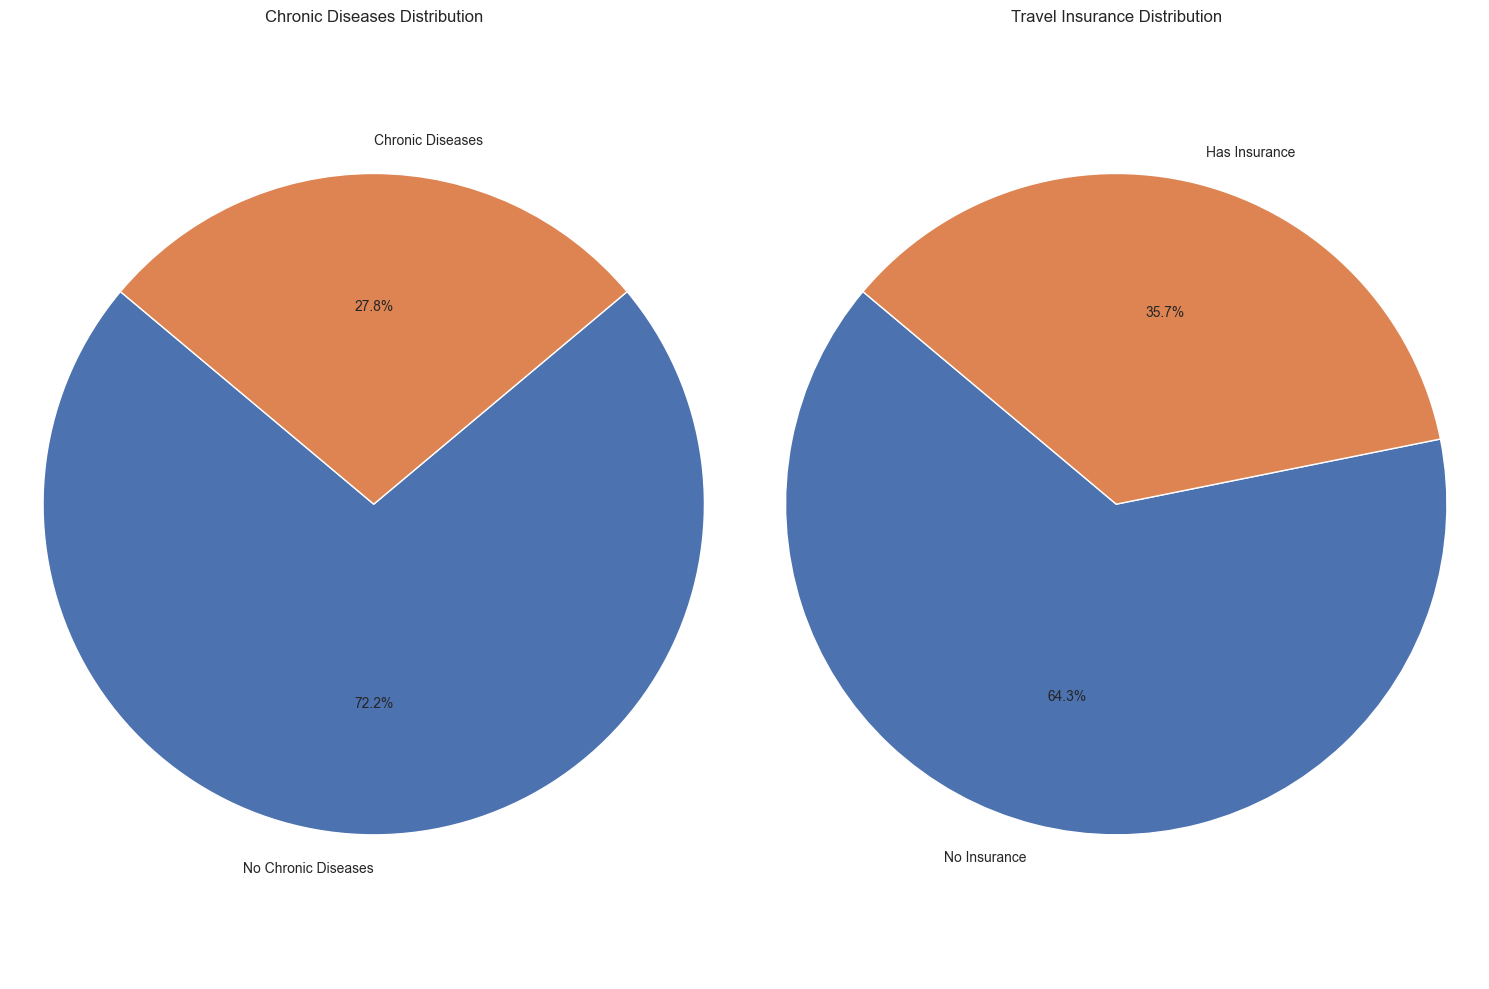

In [15]:
chronic_diseases_counts = df['chronic_diseases'].value_counts()
travel_insurance_counts = df['travel_insurance'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].pie(chronic_diseases_counts, labels=['No Chronic Diseases', 'Chronic Diseases'], autopct='%1.1f%%',
          colors=['#4C72B0', '#DD8452'], startangle=140)
ax[0].set_title('Chronic Diseases Distribution')
ax[0].axis('equal')

ax[1].pie(travel_insurance_counts, labels=['No Insurance', 'Has Insurance'], autopct='%1.1f%%',
          colors=['#4C72B0', '#DD8452'], startangle=140)
ax[1].set_title('Travel Insurance Distribution')
ax[1].axis('equal')

plt.tight_layout()
plt.show()

About 28% of individuals have chronic diseases, indicating a significant minority.

The fact that 36% of individuals have purchased travel insurance indicates awareness or need for the product.

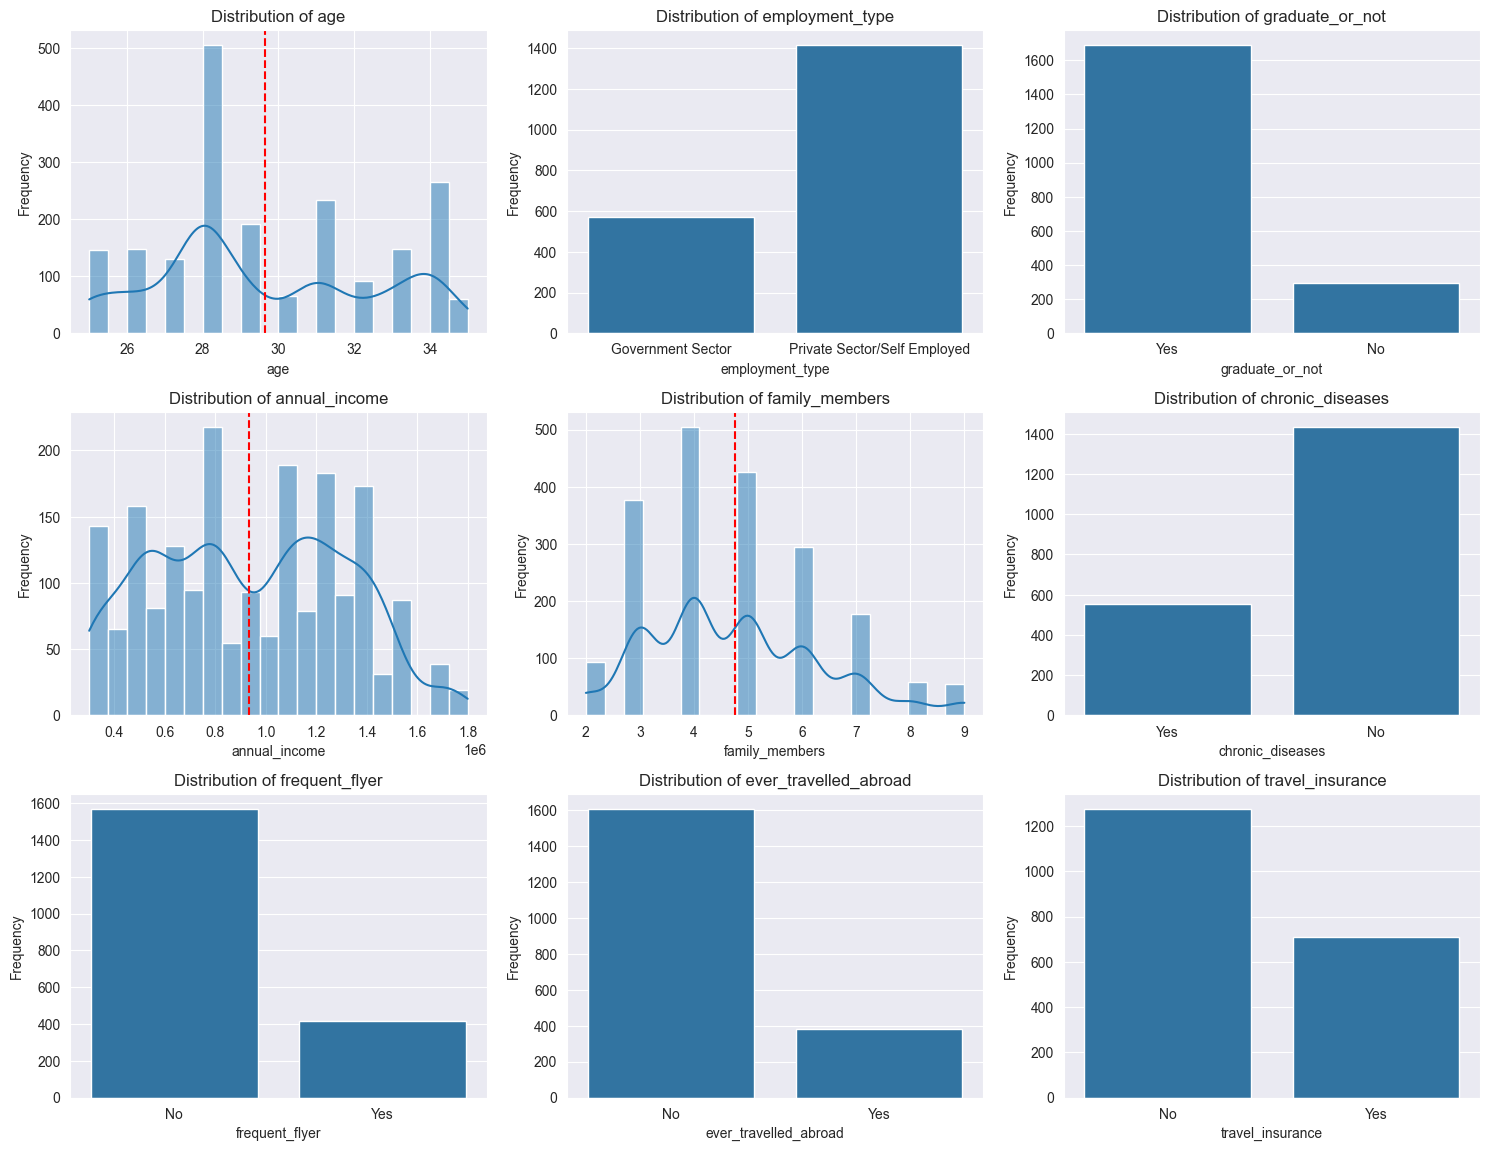

In [16]:
plt.figure(figsize=(15, 15))

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

variables = list(df.columns)

for i, var in enumerate(variables, 1):
    plt.subplot((len(variables) // 3) + 1, 3, i)

    if var in numeric_columns:
        sns.histplot(df[var], bins=20, kde=True)
        plt.axvline(df[var].mean(), color='red', linestyle='dashed')
    else:
        sns.countplot(x=df[var])
        plt.grid(True, axis='y')

    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms and bar charts provide a clear view of the distribution of each variable. There are no apparent anomalies such as impossible values or extreme outliers.

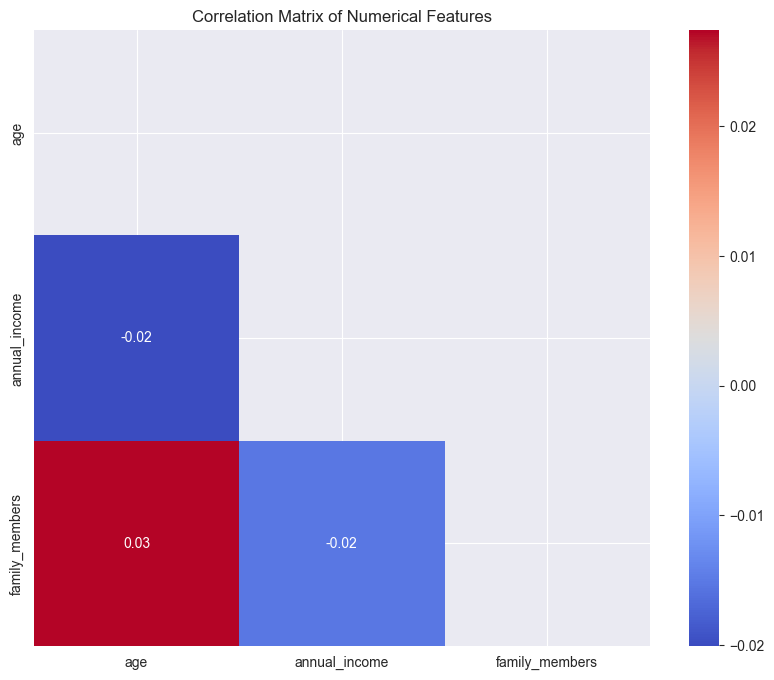

In [17]:
numerical_features = df.select_dtypes(include=[np.number]).columns

correlation_matrix = df[numerical_features].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Age and Annual Income: There is a very weak negative correlation of -0.02, indicating almost no linear relationship between these two variables.

Age and Family Members: A weak positive correlation of 0.03 suggests a slight positive relationship, but it is very close to zero.

Annual Income and Family Members: There is a weak negative correlation of -0.02, also indicating an almost negligible relationship.

### Age Distribution by Travel Insurance

By exploring the relationship between age and the decision to purchase travel insurance, we aim to identify any age-related trends or patterns.

In [18]:
bins = [25, 30, 36]
labels = ['Under 30', '30 and Over']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

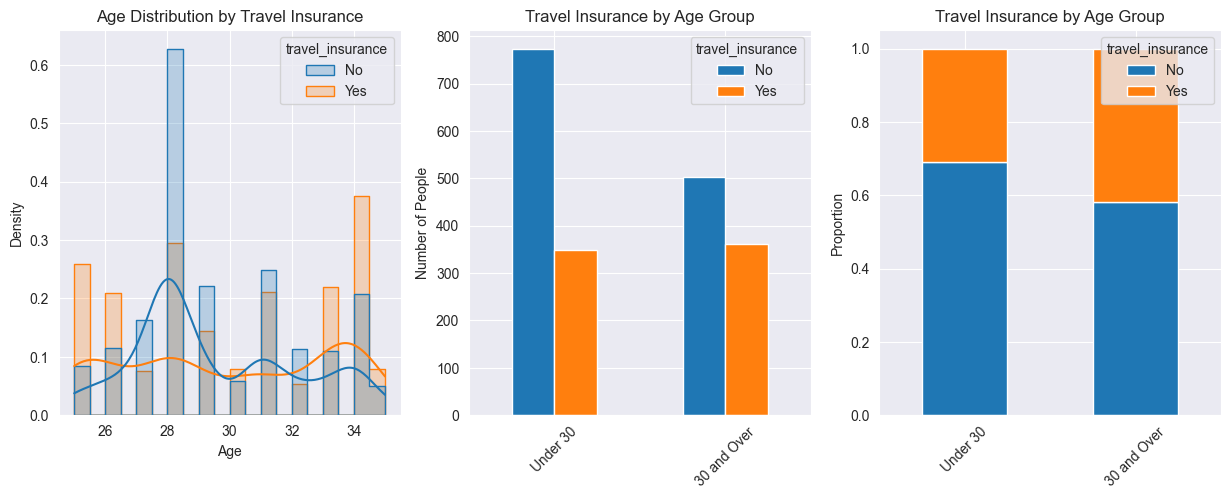

In [19]:
age_group_insurance = df.groupby(['age_group', 'travel_insurance'], observed=True).size().unstack().fillna(0)
insurance_ratio = df.groupby('age_group', observed=True)['travel_insurance'].value_counts(
    normalize=True).unstack().fillna(0)

_, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='age', hue="travel_insurance", kde=True, bins=20, element="step", stat="density",
             common_norm=False, ax=axes[0])
axes[0].set_title('Age Distribution by Travel Insurance')
axes[0].set_xlabel('Age')

age_group_insurance.plot(kind='bar', figsize=(15, 5), ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of People')
axes[1].set_title('Travel Insurance by Age Group')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

insurance_ratio.plot(kind='bar', stacked=True, figsize=(15, 5), ax=axes[2])
axes[2].set_title('Travel Insurance by Age Group')
axes[2].set_xlabel('')
axes[2].set_ylabel('Proportion')
axes[2].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.show()

The distribution for individuals without travel insurance (blue) has multiple peaks and is slightly right-skewed, with a higher density around the ages of 28 and 34. The distribution for individuals with travel insurance (orange) shows a more uniform distribution with some peaks around ages 26 and 34, but it is relatively flat compared to the no-insurance group. For individuals without insurance, there is a significant peak at age 28. For individuals with insurance, there are noticeable peaks around ages 26 and 34.

Among the "Under 30" group, a significantly larger number of people do not have travel insurance compared to those who do.In the "30 and Over" group, the number of people with and without travel insurance is closer, though still more people do not have insurance.

In the "Under 30" group, the majority do not have travel insurance, with a smaller proportion opting for it. However, the proportion of those opting for travel insurance is indeed more significant in the "30 and Over" group.

As individuals age (particularly those 30 and Over), they show a higher propensity to purchase travel insurance, which may be due to increased awareness of risks or better financial capability.

In [20]:
group1_income = df[df['travel_insurance'] == 'Yes']['age']
group2_income = df[df['travel_insurance'] == 'No']['age']

t_statistic_income, p_value_income = ttest_ind(group1_income, group2_income, equal_var=False)

mean_diff = np.mean(group1_income) - np.mean(group2_income)
std_err_diff = np.sqrt(group1_income.var() / len(group1_income) + group2_income.var() / len(group2_income))
conf_interval = (mean_diff - 1.96 * std_err_diff, mean_diff + 1.96 * std_err_diff)

print("T-Statistic:", t_statistic_income)
print("P-Value:", p_value_income)
print("Confidence Interval:", conf_interval)


T-Statistic: 2.554217515314082
P-Value: 0.010764311885970662
Confidence Interval: (np.float64(0.08633635463676248), np.float64(0.6558895930619583))


t-statistic: The value of 2.55 indicates a moderate difference in age between those who purchase travel insurance and those who do not.

p-value: The p-value of 0.011 suggests a statistically significant difference in age distributions between the two groups.

Confidence Interval: We are 95% confident that the difference in mean age between the two groups lies between 0.09 and 0.66 years, with those purchasing travel insurance being slightly older.

### Annual Income Distribution by Travel Insurance

Understanding how income levels influence the decision to buy travel insurance can help in tailoring product offerings and pricing strategies.

In [21]:
bins = [300000, 932763, 1800001]
labels = ['Low Income', 'High Income']

df['income_group'] = pd.cut(df['annual_income'], bins=bins, labels=labels, right=False)

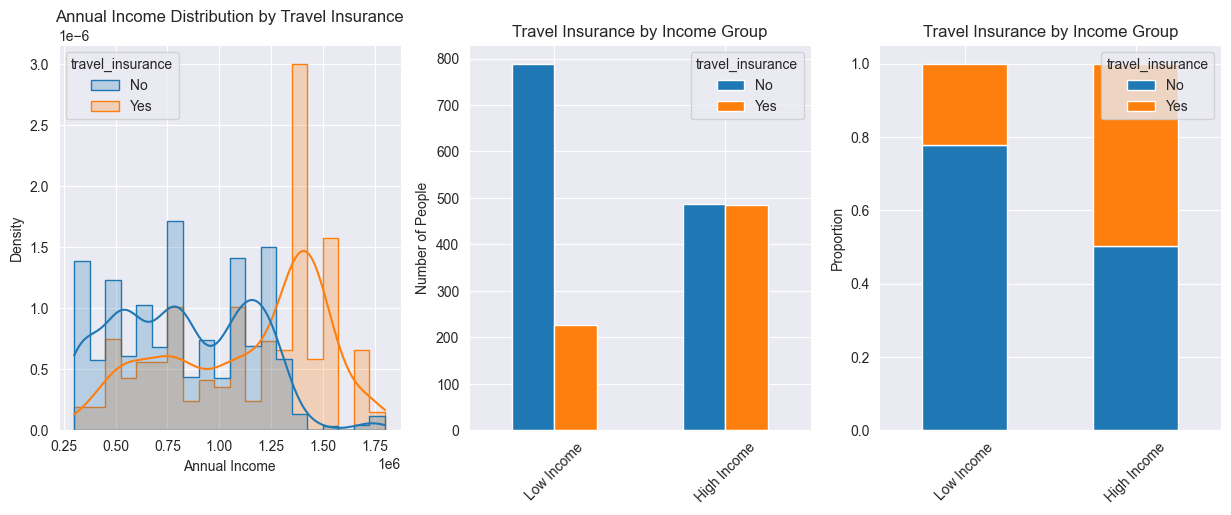

In [22]:
age_group_insurance = df.groupby(['income_group', 'travel_insurance'], observed=True).size().unstack().fillna(0)
insurance_ratio = df.groupby('income_group', observed=True)['travel_insurance'].value_counts(
    normalize=True).unstack().fillna(0)

_, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='annual_income', hue="travel_insurance", kde=True, bins=20, element="step", stat="density",
             common_norm=False, ax=axes[0])
axes[0].set_title('Annual Income Distribution by Travel Insurance')
axes[0].set_xlabel('Annual Income')

age_group_insurance.plot(kind='bar', figsize=(15, 5), ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of People')
axes[1].set_title('Travel Insurance by Income Group')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

insurance_ratio.plot(kind='bar', stacked=True, figsize=(15, 5), ax=axes[2])
axes[2].set_title('Travel Insurance by Income Group')
axes[2].set_xlabel('')
axes[2].set_ylabel('Proportion')
axes[2].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.show()

In [23]:
group1_income = df[df['travel_insurance'] == 'Yes']['annual_income']
group2_income = df[df['travel_insurance'] == 'No']['annual_income']

t_statistic_income, p_value_income = ttest_ind(group1_income, group2_income, equal_var=False)

mean_diff = np.mean(group1_income) - np.mean(group2_income)
std_err_diff = np.sqrt(group1_income.var() / len(group1_income) + group2_income.var() / len(group2_income))
conf_interval = (mean_diff - 1.96 * std_err_diff, mean_diff + 1.96 * std_err_diff)

print(t_statistic_income, p_value_income, conf_interval)

18.55569596185316 1.9420036604755432e-68 (np.float64(278989.98554836446), np.float64(344889.04430814344))


t-statistic: The value of 18.56 shows a substantial difference in mean annual income between the two groups.

p-value: The near-zero p-value confirms a significant difference in mean income between those who buy travel insurance and those who don’t.

Confidence Interval: We are 95% confident that those purchasing travel insurance earn between 278,990 and 344,889 units more annually.

### Family Members Distribution by Travel Insurance

Understanding how family size influences the decision to buy travel insurance can provide insights into the preferences of different household types.

In [24]:
bins = [1, 6, 10]
labels = ['Average Family', 'Big Family']

df['family_size'] = pd.cut(df['family_members'], bins=bins, labels=labels, right=False)

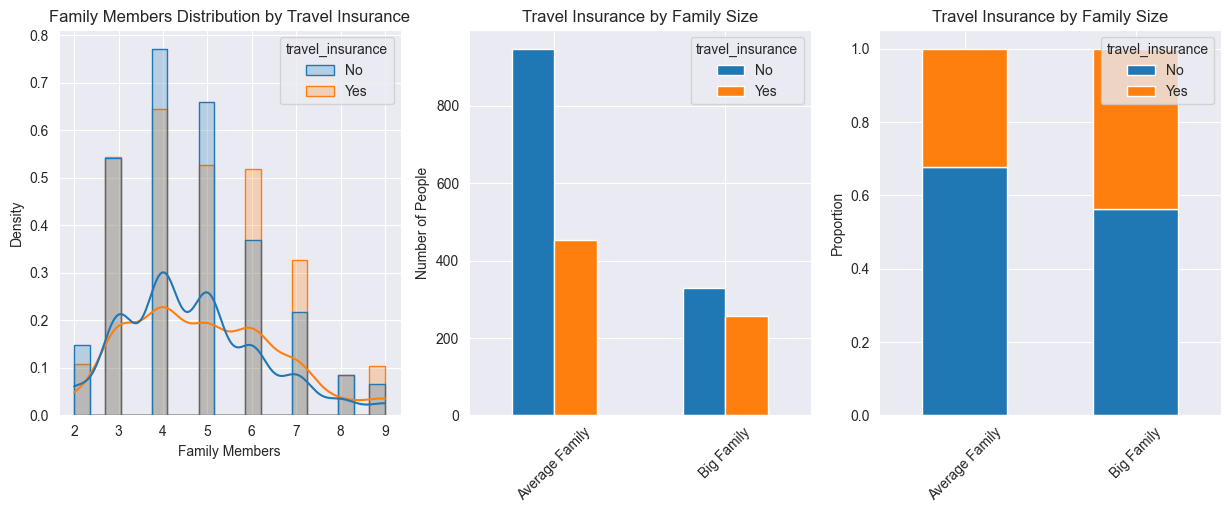

In [25]:
age_group_insurance = df.groupby(['family_size', 'travel_insurance'], observed=True).size().unstack().fillna(0)
insurance_ratio = df.groupby('family_size', observed=True)['travel_insurance'].value_counts(
    normalize=True).unstack().fillna(0)

_, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='family_members', hue="travel_insurance", kde=True, bins=20, element="step", stat="density",
             common_norm=False, ax=axes[0])
axes[0].set_title('Family Members Distribution by Travel Insurance')
axes[0].set_xlabel('Family Members')

age_group_insurance.plot(kind='bar', figsize=(15, 5), ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of People')
axes[1].set_title('Travel Insurance by Family Size')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

insurance_ratio.plot(kind='bar', stacked=True, figsize=(15, 5), ax=axes[2])
axes[2].set_title('Travel Insurance by Family Size')
axes[2].set_xlabel('')
axes[2].set_ylabel('Proportion')
axes[2].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.show()

The distribution for families without travel insurance (blue) is slightly right-skewed, with more density around lower income levels and tapering off towards higher incomes. There is a peak in the number of families without insurance at around 4 members. The distribution for families with travel insurance (orange) is also right-skewed but shows more concentration at lower numbers of family members. For families with insurance, there is a clear peak at 6 members, but with smaller peaks at 4 and 7 members as well.

For "Average Families," a significantly larger number of people do not have travel insurance compared to those who do. For "Big Families," the number of people without insurance is greater, but the gap between those with and without insurance is narrower compared to average families.

Among average families, a larger proportion does not have travel insurance. For big families, the proportion of those with insurance is noticeably higher, although those without insurance still form the majority.

Big families appear more likely to invest in travel insurance compared to average-sized families.


In [26]:
group1_income = df[df['travel_insurance'] == 'Yes']['family_members']
group2_income = df[df['travel_insurance'] == 'No']['family_members']

t_statistic_income, p_value_income = ttest_ind(group1_income, group2_income, equal_var=False)

mean_diff = np.mean(group1_income) - np.mean(group2_income)
std_err_diff = np.sqrt(group1_income.var() / len(group1_income) + group2_income.var() / len(group2_income))
conf_interval = (mean_diff - 1.96 * std_err_diff, mean_diff + 1.96 * std_err_diff)

print(t_statistic_income, p_value_income, conf_interval)

3.499665212291613 0.0004806759380524889 (np.float64(0.11805676397247361), np.float64(0.4186302335017998))


t-statistic: The value of 3.50 indicates a significant difference in the number of family members between those who purchase travel insurance and those who do not.

p-value: The p-value of 0.00048 suggests a highly significant difference in family member counts between the two groups.

Confidence Interval: We are 95% confident that the difference in the mean number of family members lies between 0.12 and 0.42, with those purchasing travel insurance tending to have slightly more family members.

## Correlations between categorical features

In [27]:
alpha = 0.05

results = []
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    contingency_table = pd.crosstab(df['travel_insurance'], df[column])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    result = {
        'Feature': column,
        'Chi2 Stat': chi2_stat,
        'p-value': p_value,
        'Significant?': 'Yes' if p_value < alpha else 'No'
    }

    results.append(result)
results = pd.DataFrame(results)
results

,Feature,Chi2 Stat,p-value,Significant?
0,employment_type,42.753803,6.208107e-11,Yes
1,graduate_or_not,0.605510,4.364834e-01,No
2,chronic_diseases,0.575411,4.481165e-01,No
3,frequent_flyer,105.857231,7.924360e-25,Yes
4,ever_travelled_abroad,370.559928,1.413451e-82,Yes
5,travel_insurance,1982.647804,0.000000e+00,Yes
6,age_group,23.903536,1.012855e-06,Yes
7,income_group,162.650066,2.983112e-37,Yes
8,family_size,23.389213,1.323185e-06,Yes


Features like employment_type, frequent_flyer, ever_travelled_abroad, travel_insurance, age_group, income_group, and family_size show a significant relationship with the target or other features, as indicated by very low p-values (much less than 0.05).

Features such as graduate_or_not and chronic_diseases do not show a statistically significant relationship with the target variable or other features, as their p-values are above the typical significance threshold of 0.05.

### Hypothesis testing

H0: There is no significant difference in the mean age between individuals with chronic diseases and those without.

H1: There is a significant difference in the mean age between individuals with chronic diseases and those without.

In [28]:
group1 = df[df['chronic_diseases'] == 'Yes']['age']
group2 = df[df['chronic_diseases'] == 'No']['age']
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

0.32785638800749195 0.7430548258078264


Since the p-value (0.7430548258078264) is greater than a typical significance level (e.g., 0.05), we fail to reject the null hypothesis. This means there is no statistically significant difference between the means of the two groups.

H0: There is no significant difference in the mean annual income between individuals who are graduates and those who are not.

H1: There is a significant difference in the mean annual income between individuals who are graduates and those who are not.

In [29]:
group1 = df[df['graduate_or_not'] == 'Yes']['annual_income']
group2 = df[df['graduate_or_not'] == 'No']['annual_income']
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

4.843057310565099 1.377491999911167e-06


Given the p-value of 1.377491999911167e-06, which is significantly smaller than the typical alpha level of 0.05, we can reject the null hypothesis. This means there is a strong statistical evidence to suggest that there is a significant difference between the means of the two groups.

# Decision tree

Mapping Categorical Variables to Binary Values

In [30]:
columns_to_encode = [
    'graduate_or_not', 'chronic_diseases', 'frequent_flyer',
    'ever_travelled_abroad', 'employment_type', 'age_group',
    'income_group', 'family_size', 'travel_insurance'
]

le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

Arrange Data into Feature Matrix and Target Vector

In [31]:
X = df[['employment_type', 'graduate_or_not', 'chronic_diseases',
        'frequent_flyer', 'ever_travelled_abroad', 'age_group', 'income_group', 'family_size']]
y = df['travel_insurance']

## Building the Base Decision Tree Classifier

In [32]:
dtc = DecisionTreeClassifier(random_state=7)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=7)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7)

dtc.fit(X_train, y_train)

y_val_pred = dtc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
scores = cross_val_score(dtc, X, y, cv=5)
val_classification_rep = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Cross-validation score:", scores.mean())
print("Validation Classification Report:\n", val_classification_rep)

Validation Accuracy: 0.7858942065491183
Cross-validation score: 0.7705150437325166
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.85       267
           1       0.78      0.48      0.59       130

    accuracy                           0.79       397
   macro avg       0.79      0.71      0.72       397
weighted avg       0.79      0.79      0.77       397



The model correctly predicts about 78.59% of the validation set labels.

The model performs well in predicting class 0, with high precision and recall, resulting in a high F1-score

The model is less effective at predicting class 1, with a significantly lower recall, indicating that it struggles to identify all true positives (those who actually purchased insurance).

In [33]:
y_test_pred = dtc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_rep)

Test Accuracy: 0.7462311557788944
Test Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       248
           1       0.75      0.49      0.59       150

    accuracy                           0.75       398
   macro avg       0.75      0.70      0.70       398
weighted avg       0.75      0.75      0.73       398



The model shows decent overall performance with an accuracy of around 74.62% on the test set. However, it is more effective at predicting customers who did not purchase insurance, as reflected in the higher recall and F1-score for class 0.

In [34]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 7,
 'splitter': 'best'}

Key Parameters for the Decision Tree Classifier.

In [35]:
features = pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance',
                                                                                                       ascending=False)
print(features)

                       importance
ever_travelled_abroad    0.466761
income_group             0.124043
age_group                0.116350
family_size              0.067533
chronic_diseases         0.064320
graduate_or_not          0.061475
employment_type          0.055820
frequent_flyer           0.043697


frequent_flyer and employment_type have the smallest impact on our model, meanwhile ever_travelled_abroad has the biggest

## Dropping some of the parameters

Let's drop two least important features.

In [36]:
X = df[['graduate_or_not', 'chronic_diseases', 'ever_travelled_abroad', 'age_group', 'income_group', 'family_size']]

In [37]:
dtc = DecisionTreeClassifier(random_state=7)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=7)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7)

dtc.fit(X_train, y_train)

y_val_pred = dtc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
scores = cross_val_score(dtc, X, y, cv=5)
val_classification_rep = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Cross-validation score:", scores.mean())
print("Validation Classification Report:\n", val_classification_rep)

Validation Accuracy: 0.7959697732997482
Cross-validation score: 0.7690011771704872
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       267
           1       0.79      0.52      0.62       130

    accuracy                           0.80       397
   macro avg       0.79      0.72      0.74       397
weighted avg       0.79      0.80      0.78       397



In [38]:
y_test_pred = dtc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_rep)

Test Accuracy: 0.7462311557788944
Test Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       248
           1       0.80      0.44      0.57       150

    accuracy                           0.75       398
   macro avg       0.76      0.69      0.69       398
weighted avg       0.76      0.75      0.72       398



In [39]:
features = pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance',
                                                                                                       ascending=False)
features

,importance
ever_travelled_abroad,0.602347
age_group,0.136106
income_group,0.122427
family_size,0.056811
graduate_or_not,0.056033
chronic_diseases,0.026277


Let's remove features that were not significant in the Chi-square test: graduate_or_not and chronic_diseases

In [40]:
X = df[['ever_travelled_abroad', 'age_group', 'income_group', 'family_size']]

In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=7)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7)

dtc.fit(X_train, y_train)

y_val_pred = dtc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
scores = cross_val_score(dtc, X, y, cv=5)
val_classification_rep = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Cross-validation score:", scores.mean())
print("Validation Classification Report:\n", val_classification_rep)

Validation Accuracy: 0.8060453400503779
Cross-validation score: 0.7715251319570143
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       267
           1       0.83      0.52      0.64       130

    accuracy                           0.81       397
   macro avg       0.81      0.73      0.75       397
weighted avg       0.81      0.81      0.79       397



In [42]:
y_test_pred = dtc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_rep)

Test Accuracy: 0.7587939698492462
Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       248
           1       0.81      0.47      0.59       150

    accuracy                           0.76       398
   macro avg       0.78      0.70      0.71       398
weighted avg       0.77      0.76      0.74       398



After dropping the chronic_diseases and frequent_flyer features, the validation accuracy is 80.60%. This is a slight improvement compared to the previous model's validation accuracy. The model continues to perform well on class 0, maintaining high recall and F1-score. There is a noticeable improvement in predicting class 1, with higher recall and F1-score compared to the previous model.

In [43]:
features = pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance',
                                                                                                       ascending=False)
features

,importance
ever_travelled_abroad,0.682170
income_group,0.134217
age_group,0.126895
family_size,0.056718


Reject the Null Hypothesis, so individuals in higher income groups are significantly more likely to purchase travel insurance compared to those in lower income groups.

Reject the Null Hypothesis, so Older age groups are significantly more likely to purchase travel insurance compared to younger age groups.

Reject the Null Hypothesis, so Larger family sizes are significantly more likely to purchase travel insurance compared to smaller family sizes.

## Combining and adding additional features

Setting up two new features:

test: filters individuals who did not graduate (0) and have chronic diseases (1).

test2: filters individuals who work in the government sector (1) and do not fly often (0).

In [44]:
df['test'] = ((df['graduate_or_not'] == 0) & (df['chronic_diseases'] == 1)).astype(int)
df['test2'] = ((df['employment_type'] ==1) & (df['frequent_flyer'] == 0)).astype(int)

In [45]:
X = df[['ever_travelled_abroad', 'age_group', 'income_group', 'family_size', 'test', 'test2']]

In [46]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=7)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7)

dtc.fit(X_train, y_train)

y_val_pred = dtc.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
scores = cross_val_score(dtc, X, y, cv=5)
val_classification_rep = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Cross-validation score:", scores.mean())
print("Validation Classification Report:\n", val_classification_rep)

Validation Accuracy: 0.8110831234256927
Cross-validation score: 0.7740364289963673
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       267
           1       0.82      0.55      0.65       130

    accuracy                           0.81       397
   macro avg       0.81      0.74      0.76       397
weighted avg       0.81      0.81      0.80       397



In [47]:
y_test_pred = dtc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_rep)

Test Accuracy: 0.7613065326633166
Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       248
           1       0.78      0.51      0.62       150

    accuracy                           0.76       398
   macro avg       0.77      0.71      0.72       398
weighted avg       0.76      0.76      0.75       398



In [48]:
features = pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance',
                                                                                                       ascending=False)
features

,importance
ever_travelled_abroad,0.574647
age_group,0.127153
income_group,0.118812
test2,0.096173
family_size,0.043635
test,0.039580


After adding the features with minimal impact, the model's performance on the test set remains stable, with a test accuracy of 81.10%. This indicates that the feature addition was successful.

## Build a Random Forest Classifier

In [49]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=7)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=7)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=7)

rf_clf.fit(X_train, y_train)

y_val_pred = rf_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
scores = cross_val_score(rf_clf, X, y, cv=5)
val_classification_rep = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Cross-validation score:", scores.mean())
print("Validation Classification Report:\n", val_classification_rep)

Validation Accuracy: 0.8110831234256927
Cross-validation score: 0.7755452324595269
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       267
           1       0.77      0.60      0.68       130

    accuracy                           0.81       397
   macro avg       0.80      0.76      0.77       397
weighted avg       0.81      0.81      0.80       397



In [50]:
y_test_pred = dtc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_rep)

Test Accuracy: 0.7613065326633166
Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       248
           1       0.78      0.51      0.62       150

    accuracy                           0.76       398
   macro avg       0.77      0.71      0.72       398
weighted avg       0.76      0.76      0.75       398



In [51]:
features = pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance',
                                                                                                       ascending=False)
features

,importance
ever_travelled_abroad,0.574647
age_group,0.127153
income_group,0.118812
test2,0.096173
family_size,0.043635
test,0.039580


In [52]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
scores = cross_val_score(dtc, X, y, cv=5)

# Print the mean cross-validation score
print("Cross-validation score:", scores.mean())

Cross-validation score: 0.7740364289963673


Both models have identical accuracy. Random Forest balances performance by boosting precision slightly at the cost of recall in the validation set. Decision Tree offers better recall and F1-Score for the minority class, which may be crucial depending on your goals.

### Hyperparameter Tuning with GridSearchCV

This part of the notebook demonstrates the process of hyperparameter tuning using GridSearchCV to optimize a Random Forest Classifier, followed by cross-validation to compare the performance of the tuned Random Forest and a Decision Tree model.

In [53]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

y_pred_tuned = best_rf.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Tuned Model Accuracy: 0.7587939698492462


The tuned Random Forest model achieves a test accuracy of 75.87%, slightly better than the default model.

In [54]:
dt = DecisionTreeClassifier(random_state=7)
rf = RandomForestClassifier(n_estimators=100, random_state=7)

dtc_scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Accuracy: {dtc_scores.mean():.4f} ± {dtc_scores.std():.4f}")

rf_clf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_clf_scores.mean():.4f} ± {rf_clf_scores.std():.4f}")

Decision Tree Cross-Validation Accuracy: 0.7740 ± 0.0194
Random Forest Cross-Validation Accuracy: 0.7755 ± 0.0183


In [55]:
if dtc_scores.mean() > rf_clf_scores.mean():
    print("Decision Tree has a higher average accuracy.")
else:
    print("Random Forest has a higher average accuracy.")

if dtc_scores.std() > rf_clf_scores.std():
    print("Decision Tree has more variability across folds.")
else:
    print("Random Forest has more consistent performance across folds.")

Random Forest has a higher average accuracy.
Decision Tree has more variability across folds.


## K-Fold Cross-Validation

This part of the notebook demonstrates the use of K-Fold cross-validation to evaluate the performance of a Decision Tree Classifier

In [56]:
kf = KFold(n_splits=5, shuffle=False)

In [57]:
n = 0
accuracy_list = []
for n, (train_index, test_index) in enumerate(kf.split(X, y)):
    dtc = DecisionTreeClassifier().fit(X.iloc[train_index], y.iloc[train_index])
    score = dtc.score(X.iloc[test_index], y.iloc[test_index])

    accuracy_list.append(score)
    print('Model:', n + 1)
    print('Accuracy:', accuracy_list[n])

Model: 1
Accuracy: 0.7663316582914573
Model: 2
Accuracy: 0.7939698492462312
Model: 3
Accuracy: 0.801007556675063
Model: 4
Accuracy: 0.760705289672544
Model: 5
Accuracy: 0.7581863979848866


These results show how the model performs across different subsets of the data.

In [58]:
print('Mean of Accuracy for all folds: ', np.mean(accuracy_list))

Mean of Accuracy for all folds:  0.7760401503740364


In [59]:
score = dtc.score(X_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.7613065326633166


The mean accuracy across the folds is slightly higher than the test set accuracy, which is expected due to the cross-validation technique leveraging more data for training in each fold.

## Conclusion

Based on our analysis, the features ever_travel_abroad, income_group, family_size, and age_group were found to be significantly important. The Chi-square test indicated that chronic_diseases and graduated_or_not are insignificant in the travel insurance dataset, meaning they have minimal impact on the model. Additionally, when features are less important, they contribute less to the model's performance. However, by introducing two new test features, our findings suggest that further feature engineering on these variables could potentially enhance the model's accuracy.

The tuned model performs better overall compared to the base model. It has higher validation and test accuracy and better performance metrics (precision, recall, F1-score) for the more challenging class (class 1). Therefore, the tuning process has successfully improved the model's ability to generalize and handle the prediction task more effectively.

This decision tree diagram visually represents how the model makes decisions to classify data points based on the features in your dataset.

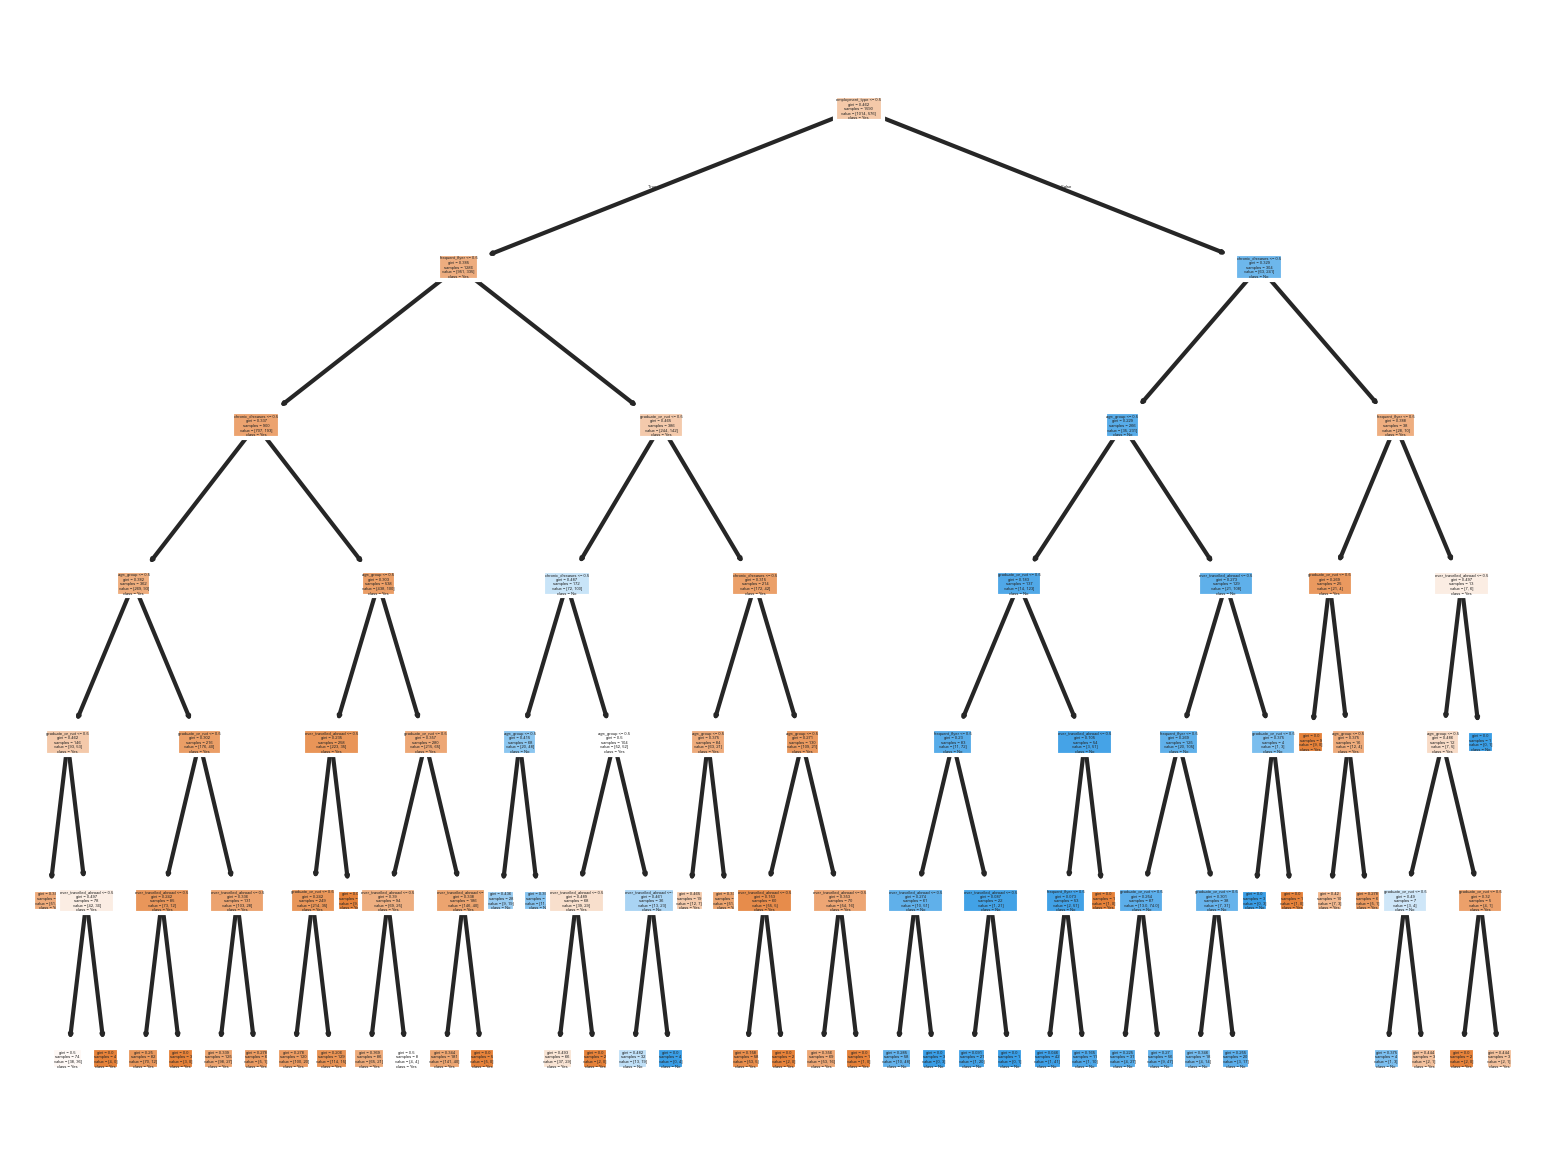

In [60]:
feature_cols = ['employment_type', 'graduate_or_not', 'chronic_diseases',
                'frequent_flyer', 'ever_travelled_abroad', 'age_group', 'income_group', 'family_size']

plt.figure(dpi=300)
tree.plot_tree(dtc,
               feature_names=feature_cols,
               class_names=['Yes', 'No'],
               filled=True)
plt.show()

### Suggestions and Improvements

* Introduce new features derived from existing ones, such as "income per family member," which could provide additional insights.
* Combining features to see if certain combinations are more predictive of purchasing travel insurance.
* Try Other Algorithms, such as XGBoost, or Support Vector Machines (SVM) to see if they outperform the current models.
* Use Bayesian Optimization for hyperparameter tuning instead of GridSearchCV.